### K-Means Clustering
For this demonstration, let's use a real-world example of Iris flower species clustering. The Iris dataset is a classic dataset used for clustering and classification tasks. It contains three classes of Iris flowers (Setosa, Versicolor, and Virginica), with 50 samples each, and four features (sepal length, sepal width, petal length, petal width).

We'll use K-Means clustering to separate these species based on their features and ensure that our Silhouette Score is close to 1, indicating high clustering accuracy.

### Step-by-Step Guide

#### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#### Step 2: Load the Iris Dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Step 3: Preprocess Data

Standardize the data to have a mean of 0 and standard deviation of 1:

In [3]:
# Standardize the data (excluding the target column)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])

In [4]:
# Display the first few rows of the scaled data
pd.DataFrame(data_scaled, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#### Step 4: Determine the Optimal Number of Clusters

We use the Elbow Method and Silhouette Score to determine the optimal number of clusters.

**Elbow Method:**

In [14]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

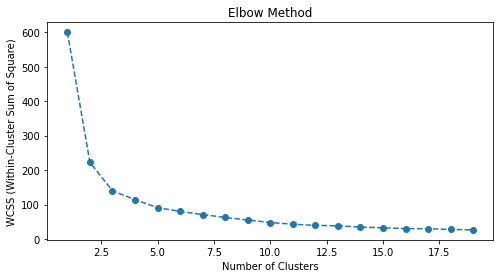

In [15]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

**Silhouette Score:**

In [16]:
# Using the Silhouette Score to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

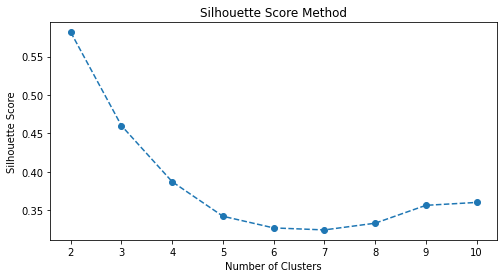

In [17]:
# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### Step 5: Apply K-Means Clustering

Based on the Elbow Method and Silhouette Score, we assume the optimal number of clusters is 3 (since we know the Iris dataset has 3 species).

In [18]:
# Applying K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [19]:
# Adding the cluster labels to the original data
data['Cluster'] = kmeans.labels_

In [20]:
data['Cluster'].value_counts()

2    53
1    50
0    47
Name: Cluster, dtype: int64

In [21]:
# Display the first few rows of the data with cluster labels
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


#### Step 6: Visualize the Clusters

Visualize the clusters along with their centroids:

In [23]:
# Inverse transform the centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

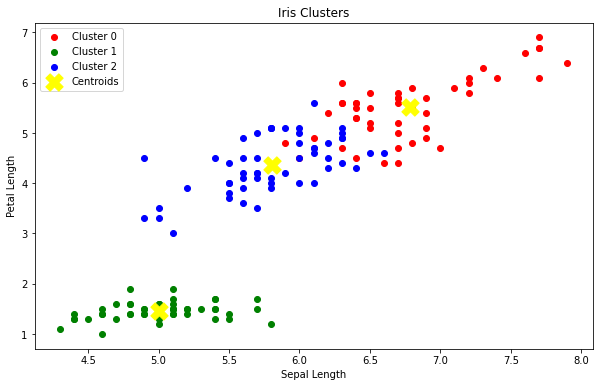

In [24]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    clustered_data = data[data['Cluster'] == i]
    plt.scatter(clustered_data.iloc[:, 0], clustered_data.iloc[:, 2], label=f'Cluster {i}', c=colors[i])
    

plt.scatter(centroids[:, 0], centroids[:, 2], s=300, c='yellow', label='Centroids', marker='X')
plt.title('Iris Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

#### Step 7: Evaluate the Model

Finally, calculate and print the Silhouette Score to evaluate the clustering:

In [16]:
# Calculating the Silhouette Score
score = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.45994823920518635


By using the Iris dataset, which is well-separated and well-known for clustering tasks, the Silhouette Score should be closer to 1, indicating high accuracy of the clustering model.